In [1]:
# Imports
import string
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ling\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [91]:
# Load data
df =pd.read_csv('data.csv')

C:\Users\ling\AppData\Local\Temp\ipykernel_12224\1494377453.py:2: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('data.csv')


# Part 1 – Data Preparation and Preprocessing. [15 points]

### 1. Describe the dataset. (8 points)

In [92]:
# Descrive the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [93]:
# Number of records
df.shape[0]

318477

In [94]:
# period and different dates of job postings
df['Date'] = pd.to_datetime(df.Date)

unique_date = df['Date'].nunique()

print('Started Date:', df.Date.min(), '\n','Ended Date:', df.Date.max(),'\n')
print('Total of days:', unique_date)

Started Date: 2018-10-01 00:00:00+00:00 
 Ended Date: 2019-03-13 00:00:00+00:00 

Total of days: 163


In [95]:
# total location & most job postings
location = df['Location'].value_counts()
total_location = len(location)
most_location= location.idxmax()

print('Total location:', total_location)
print('Location with most hob postings:', most_location )

Total location: 65
Location with most hob postings: Sydney


In [96]:
job_sector = df['Classification'].value_counts()
print('Total job sector:', len(job_sector), '\n')
print('Total of classification:', '\n', job_sector)

Total job sector: 30 

Total of classification: 
 Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communicati

In [97]:
ict_df = df[df['Classification']=='Information & Communication Technology']
print('Total of sub-sector in ICT:', '\n', ict_df['SubClassification'].value_counts())

Total of sub-sector in ICT: 
 SubClassification
Developers/Programmers                   4211
Business/Systems Analysts                2986
Programme & Project Management           2413
Architects                               1548
Engineering - Software                   1437
Help Desk & IT Support                   1374
Networks & Systems Administration        1194
Consultants                              1149
Other                                     997
Testing & Quality Assurance               831
Security                                  774
Management                                746
Engineering - Network                     552
Database Development & Administration     551
Web Development & Production              452
Sales - Pre & Post                        449
Product Management & Development          376
Telecommunications                        357
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing               

In [98]:
print('Lowest Salary:', df['LowestSalary'].value_counts(ascending=True), '\n')
print('Highest Salary:', df['HighestSalary'].value_counts(ascending=True))

Lowest Salary: LowestSalary
200    11411
30     23476
80     24249
120    24514
150    25841
50     27027
100    27673
60     28499
70     28712
40     34436
0      62639
Name: count, dtype: int64 

Highest Salary: HighestSalary
999    11411
40     23476
100    24249
150    24514
200    25841
60     27027
120    27673
70     28499
80     28712
50     34436
30     62639
Name: count, dtype: int64


In [99]:
df.groupby('JobType').agg({'LowestSalary':'min','HighestSalary':'max'})

,LowestSalary,HighestSalary
JobType,,
Casual/Vacation,0,999
Contract/Temp,0,999
Full Time,0,999
Part Time,0,999


### 2. Normalize and clean data. (7 points) 

In [100]:
# Sum of Average Salary by Classification
#df['AverageSalary'] = (df['LowestSalary']+df['HighestSalary'])/2
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) /2 )
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [101]:
# keep 8 number int 
df["Id"] = df['Id'].replace(to_replace=r'&.*', value='', regex=True)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [102]:
# fix the data type of column Date

df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [103]:
# Set column "Id" to type int64
df["Id"] = df['Id'].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])
# Data types after data cleaning and conversions
df.dtypes

Id                                 int64
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
AverageSalary                    float64
dtype: object

In [104]:
# total of duplicate
df[df.duplicated()].shape[0]

108

In [105]:
# delete duplicate
df = df.drop_duplicates()

In [106]:
missing_value = df.isnull().sum()

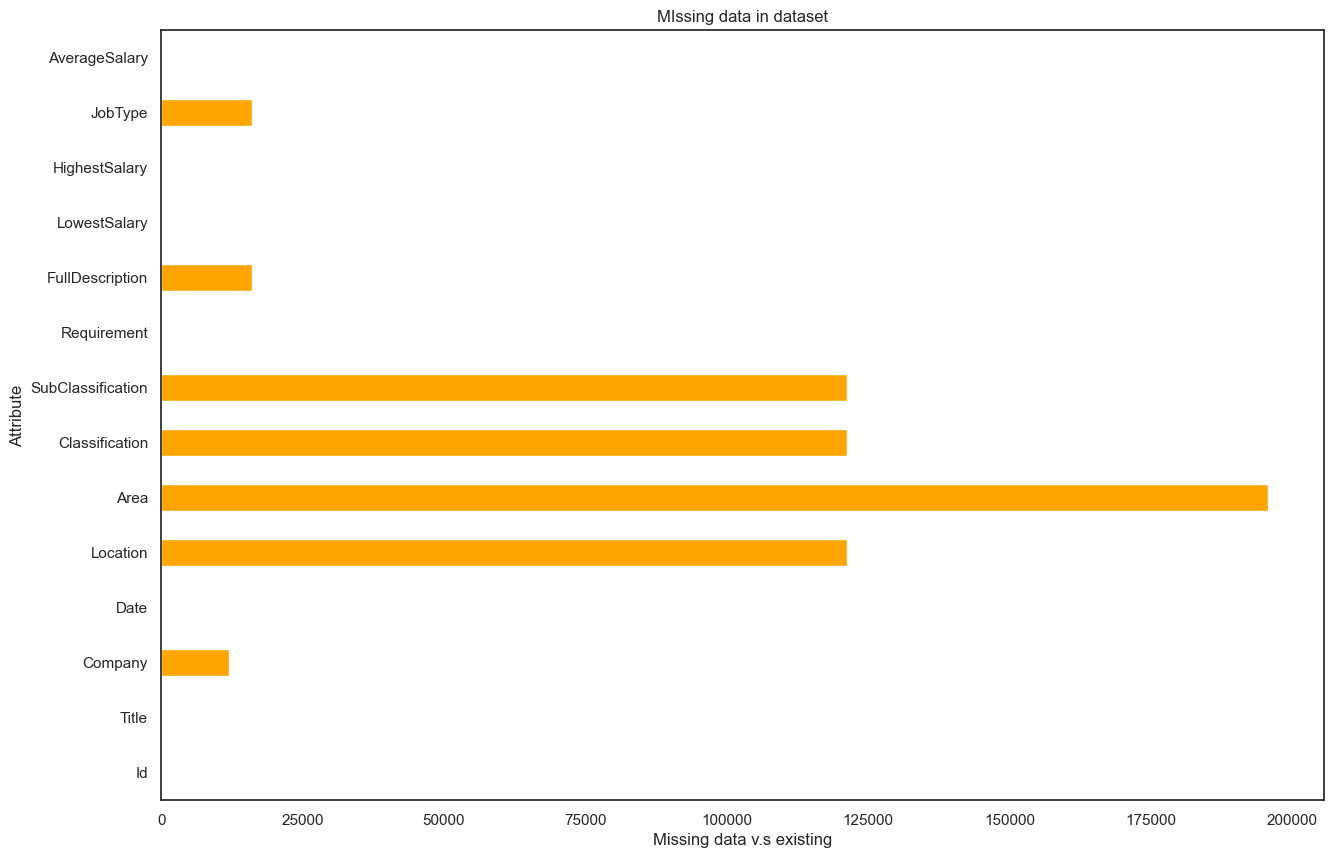

In [107]:
%matplotlib inline

plt.figure(figsize=(15,10))
missing_value.plot(kind='barh', color='orange')
plt.title('MIssing data in dataset')
plt.xlabel('Missing data v.s existing')
plt.ylabel('Attribute');

# Part 2 – Data Understanding. [5 points]

In [108]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [109]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62586,62586,59564,62586,38488,24364,38488,38488,62584,56043,62586,62586,56058,"15,000",62586
35.0,23471,23471,22292,23471,16391,9809,16391,16391,23471,22091,23471,23471,22093,"35,000",23471
45.0,34431,34431,32071,34431,21731,13259,21731,21731,34430,33575,34431,34431,33580,"45,000",34431
55.0,27018,27018,25670,27018,16552,10746,16552,16552,27017,26197,27018,27018,26213,"55,000",27018
65.0,28495,28495,27286,28495,18117,11390,18117,18117,28495,27542,28495,28495,27564,"65,000",28495
75.0,28706,28706,27788,28706,17047,10451,17047,17047,28706,27664,28706,28706,27668,"75,000",28706
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27669,27669,27146,27669,17133,10571,17133,17133,27667,26678,27669,27669,26679,"110,000",27669
135.0,24506,24506,24157,24506,14693,9476,14693,14693,24506,23602,24506,24506,23604,"135,000",24506


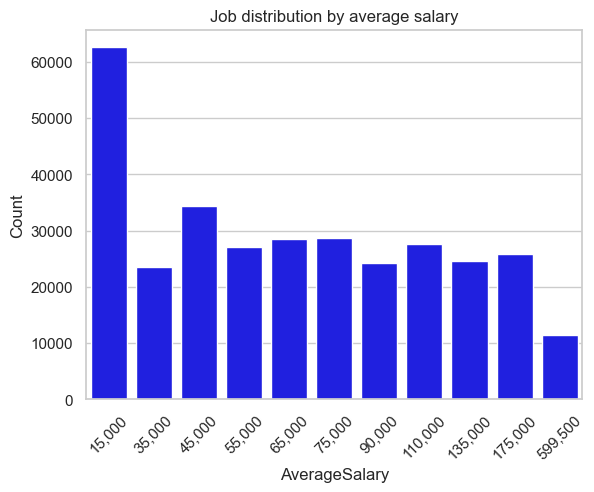

In [110]:
# the total jobs of each range

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')

sns.barplot(data=averageSalaryDf, x="AverageSalary", y="Count", color='blue')
plt.title('Job distribution by average salary')
plt.xticks(rotation=45)
plt.show()

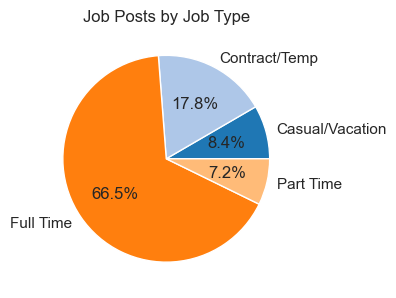

In [111]:
%matplotlib inline

jobTypeDf = df.groupby('JobType').count()
jobTypeDf['Count']= jobTypeDf['Id']
jobTypeDf['JobType'] = jobTypeDf.index

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(jobTypeDf['Count'], labels = jobTypeDf['JobType'], autopct='%1.1f%%', 
        startangle=0, colors=colors)


plt.tight_layout()
plt.title('Job Posts by Job Type')
plt.show()

In [112]:
classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]
classificationDf.sort_values('Count', ascending=False, inplace=True)
classificationDf

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,,
Information & Communication Technology,22787,22787,22438,22787,22787,16083,22787,22787,21157,22787,22787,21158,22787,Information & Communication Technology,22787
Trades & Services,17966,17966,16492,17966,17966,9664,17966,17966,17119,17966,17966,17120,17966,Trades & Services,17966
Healthcare & Medical,17068,17068,16373,17068,17068,7948,17068,17068,16368,17068,17068,16371,17068,Healthcare & Medical,17068
Hospitality & Tourism,15513,15513,14881,15513,15513,9634,15513,15513,14287,15513,15513,14291,15513,Hospitality & Tourism,15513
"Manufacturing, Transport & Logistics",12372,12372,11461,12372,12372,8542,12372,12372,11748,12372,12372,11750,12372,"Manufacturing, Transport & Logistics",12372
Administration & Office Support,10017,10017,9532,10017,10017,6841,10017,10017,9213,10017,10017,9213,10017,Administration & Office Support,10017
Accounting,9365,9365,9053,9365,9365,7305,9365,9365,8759,9365,9365,8759,9365,Accounting,9365
Education & Training,9272,9272,9030,9272,9272,5864,9272,9272,8711,9272,9272,8715,9272,Education & Training,9272
Construction,8369,8369,8039,8369,8369,5055,8369,8369,8019,8369,8369,8020,8369,Construction,8369


Text(0.5, 0, 'Number of Postings')

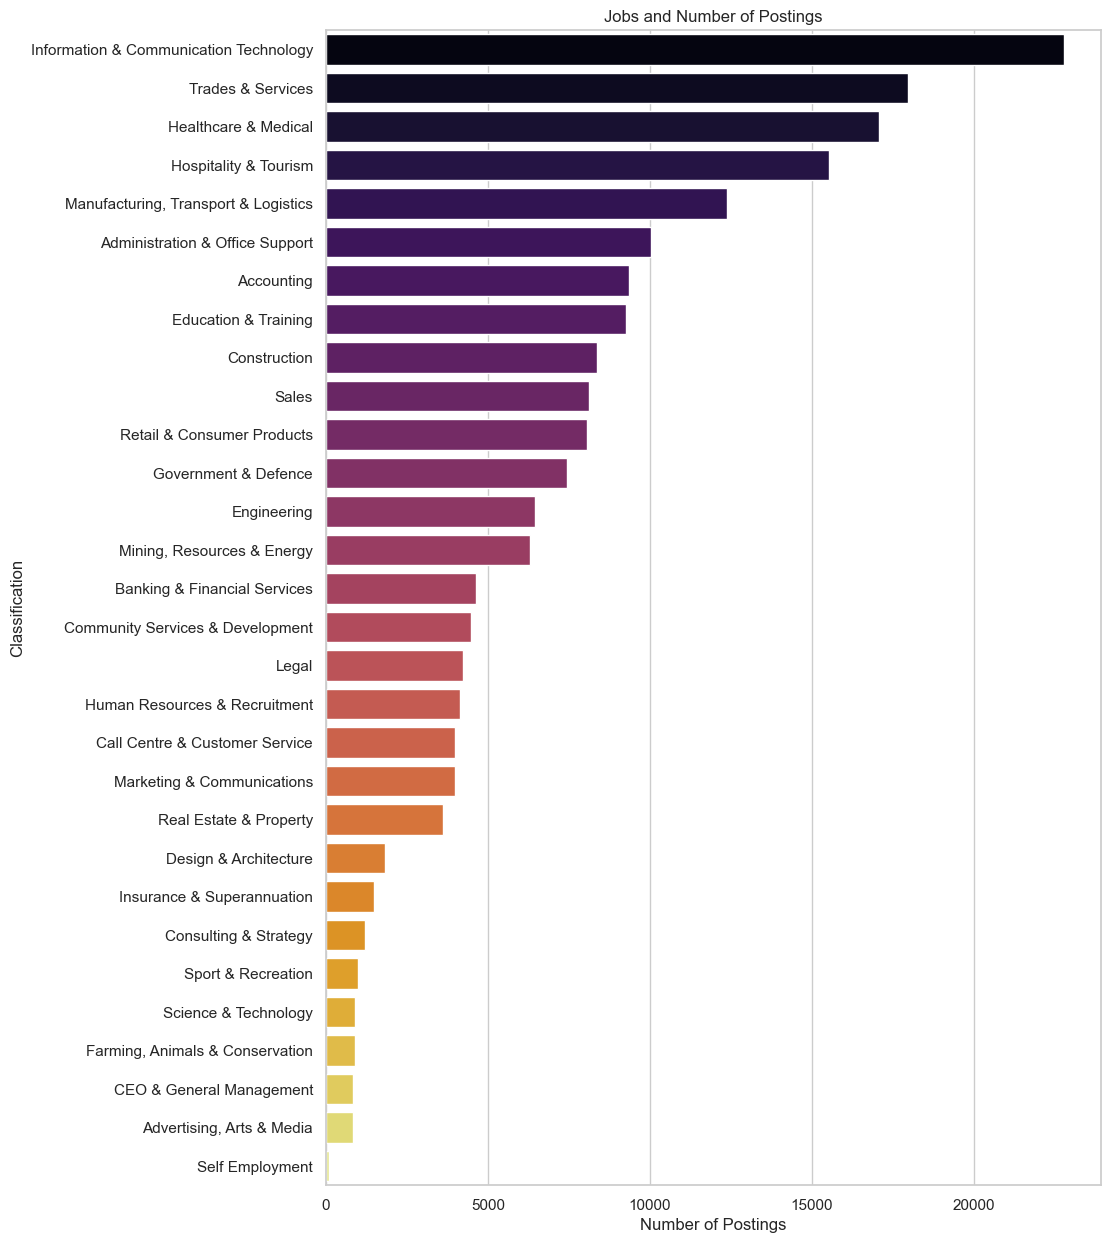

In [113]:
%matplotlib inline

plt.figure(figsize=(10,15))
sns.barplot(data=classificationDf, x="Count", y="Classification", palette = 'inferno')
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')

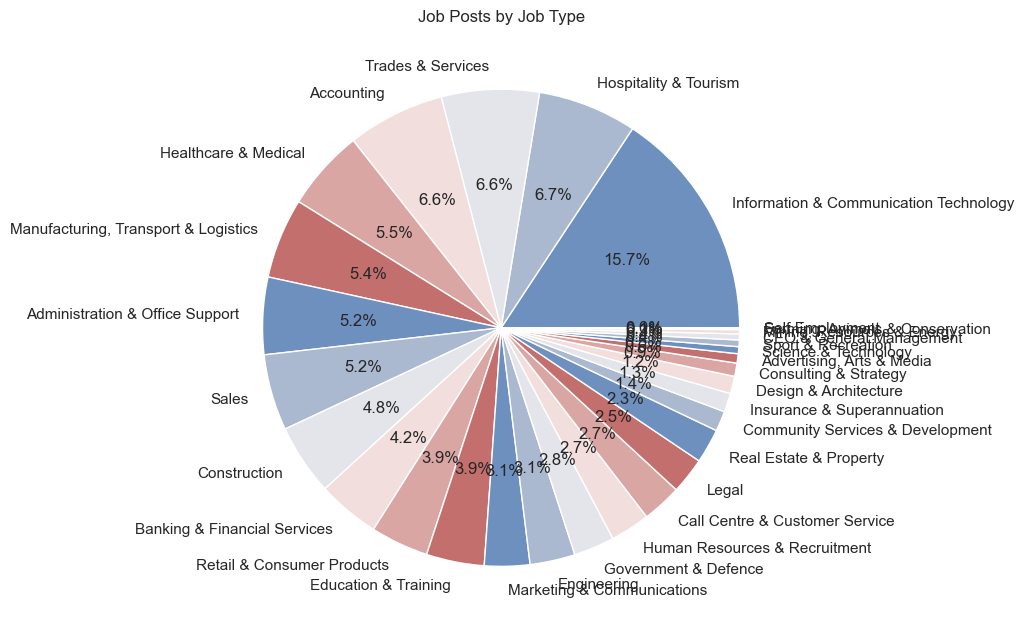

In [114]:
%matplotlib inline

# Pie char for job market share of cities
from matplotlib import cm

# Filter data for selected cities
sydney_data = df[df['Location'] == 'Sydney']

# Sum counts for cities not in the selected list and add as 'Other'
sydney_classification = sydney_data['Classification'].value_counts()

labels = sydney_classification.index
sizes = sydney_classification.values

# Set the style
sns.set_style("white")


# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=0, colors =sns.color_palette("vlag"))


plt.tight_layout()
plt.title('Job Posts by Job Type')
plt.show()

In [115]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values('Count', ascending=False, inplace=True)
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60729,60729,58884,60729,53746,60729,60729,60729,57427,60729,60729,57441,60729,Sydney,60729
Melbourne,46656,46656,44907,46656,41268,46656,46656,46652,43804,46656,46656,43810,46656,Melbourne,46656
Brisbane,21455,21455,20601,21455,17403,21455,21455,21455,20207,21455,21455,20214,21455,Brisbane,21455
Perth,13192,13192,12760,13192,10165,13192,13192,13192,12282,13192,13192,12293,13192,Perth,13192
Adelaide,6650,6650,6300,6650,0,6650,6650,6650,6311,6650,6650,6312,6650,Adelaide,6650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


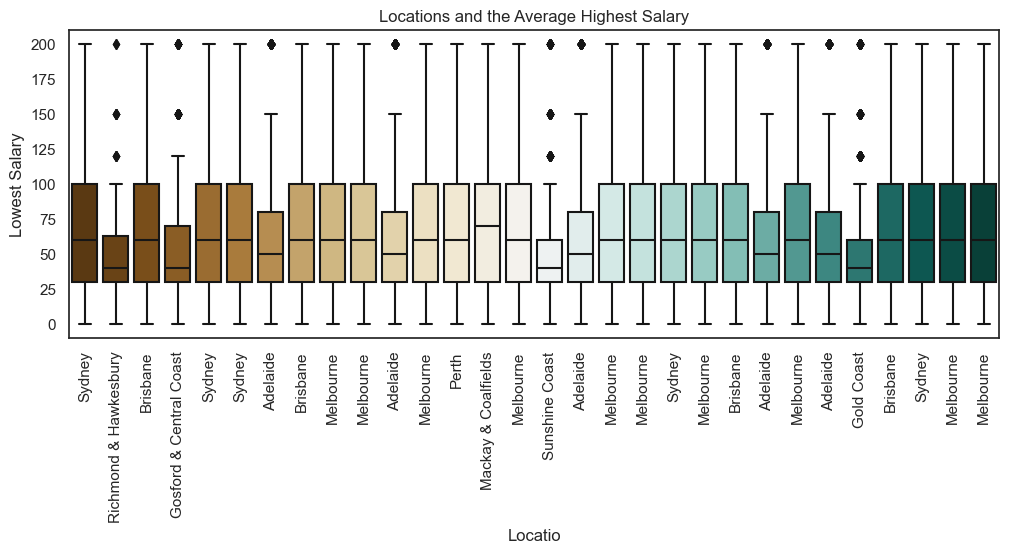

In [116]:
# Visualize the salary distribution for each city using a boxplot chart

plt.figure(figsize=(12, 4))
sns.boxplot(data= df, x='Location', y= 'LowestSalary', order= df['Location'][:30], 
            palette = sns.color_palette("BrBG", n_colors=30))
plt.title("Location and the Distribution of Lowest Salary")
plt.xticks(rotation=90)
plt.title('Locations and the Average Highest Salary')
plt.xlabel('Locatio')
plt.ylabel('Lowest Salary')
plt.show()


# Part 3 – Data Analysis and Visualisation. [6 points]

### 1. Analyse by comparison. (2 points) 

In [ ]:
# chosen cities/locations: Sydney and Brisbane

df_sydney = df[df['Location'] == 'Sydney']
df_brisbane = df[df['Location'] == 'Brisbane']

In [ ]:
# total job in each city

print("Total jon in Sydney = ",len(df_sydney))
print("Total jon in Brisbane = ",len(df_brisbane))

In [ ]:
df_sydney["JobType"].value_counts()

In [ ]:
df_brisbane["JobType"].value_counts()

Comment: 

Based on above result, we can see that Sydney has more job than Brisbane. 

In [ ]:
Top5_JobSector_sydney = df_sydney['Classification'].value_counts().head(5)
Top5_JobSector_sydney

In [ ]:
Top5_JobSector_brisbane = df_brisbane['Classification'].value_counts().head(5)
Top5_JobSector_brisbane

In [ ]:
%matplotlib inline

labels = Top5_JobSector_sydney.index
sizes = Top5_JobSector_sydney.values

# Set the style
sns.set_style("white")


# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=0, colors =sns.color_palette("pastel"))


plt.tight_layout()
plt.title('Top 5 Job Sector in Sydney')
plt.show()

In [ ]:
%matplotlib inline

labels = Top5_JobSector_brisbane.index
sizes = Top5_JobSector_brisbane.values

# Set the style
sns.set_style("white")


# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=0, colors =sns.color_palette("muted"))


plt.tight_layout()
plt.title('Top 5 Job Sector in Sydney')
plt.show()

In [ ]:
df_sydney['AverageSalary'].value_counts()

In [ ]:
df_brisbane['AverageSalary'].value_counts()

In [ ]:
top_5 = df_sydney['Company'].value_counts().head(5)
print("Top 5 companies in Sydney:")
for company in top_5.index:
    sector = df_sydney[df_sydney['Company'] == company]['Classification'].iloc[0]
    print(f"Company: {company}, Sector: {sector}")

In [ ]:
top_5 = df_brisbane['Company'].value_counts().head(5)
print("Top 5 companies in Brisbane:")
for company in top_5.index:
    sector = df_brisbane[df_brisbane['Company'] == company]['Classification'].iloc[0]
    print(f"Company: {company}, Sector: {sector}")

Commnet: 

Sydney is best for employees. 
Sydeney has higher salary compared to brisbane.
Sydney offer more job than brisbane.


### 2. Analyse by time. (2 points) 

In [ ]:
import calendar

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month

jobpost_month = df['Month'].value_counts().sort_index()

#pos = [1, 2, 3, 10, 11, 12]

#lab = ['Jan', 'Feb', 'Mar', 'Oct', 'Nov', 'Dec']

# bar chart
plt.figure(figsize=(10, 6))
jobpost_month.plot(kind='bar', color=sns.color_palette("ch:start=.2,rot=-.3"))
plt.title('Number of Job Posts by Month')
plt.xlabel('Month')
plt.ylabel('Average number of Job Posts')
#plt.xticks(pos, lab) 
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [ ]:
import calendar

# Create a dictionary to map day of the week integers to abbreviated day names
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Map day of the week integers to abbreviated day names
day_labels = [day_names[i] for i in range(7)]

# Extract Week from the 'Date' column
df['Week'] = df['Date'].dt.weekday

jobpost_weekday = df['Week'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
jobpost_weekday.plot(kind='bar', color = sns.color_palette("Blues", n_colors=7))
plt.title('Job Posts by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Job Posts')
plt.xticks(range(7), day_labels, rotation=0) 
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [ ]:
# Extract days from the 'Date' column
df['Days'] = df['Date'].dt.day

jobpost_day = df['Days'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=jobpost_day.index, y=jobpost_day.values, color='Skyblue')
plt.title('Average Job Posts by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Posts') 
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [ ]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

Conclusion:

Based on the line chart shows that Sydney are the higest

### 3. Forecasting and skill extractions. (2 points) 

In [ ]:
#get dataframe with dates as index
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)

#exclude March because the dataset stops halfway through the month
df_timeseries_total = df_timeseries_total[:151]

# Get the count of jobs over time
df_timeseries_total = df_timeseries_total['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
from wordcloud import WordCloud

classifications = df['Requirement'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
    
interact(update, Classification=classifications)